<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
## SEM2 2022/3

### CS6462 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
March 7th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">Ananya Krithika</span>
### Student Surname: <span style="color:red">Thyagarajan</span>
### Student ID: <span style="color:red">23187123</span>
### Date of Final Submission: <span style="color:red">31/03/2024</span>
***

## Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

<span style="color:red">TODO: your description goes here</span>

We identify the following random variables, their domains, and the dependencies between these random variables in order to characterise the challenge of developing a Bayesian network using the given real-world scenario:

The Domains of Random Variables:

Intelligence (I): {low, high}
Module Difficulty (D): {easy, hard}
Health Status (H): {sick, healthy}
Grade (G): {A, B, C}
Forum Activity (F): {not active, active}
Recommendation Letter Quality (L): {weak, strong}
Dependencies Among the Random Variables:

The three main factors that directly impact the grade (G) are intelligence (I), module difficulty (D), and health status (H). Thus, the grade is based on the probability of intelligence, the complexity of the module, and the state of health.
Both the grade (G) and the forum activity (F) have an impact on the recommendation letter quality (L). The professor evaluates the quality of the recommendation letter based on the student's grade and forum participation.
These dependencies can be shown as follows in the Bayesian Network:



I → G

D → G

H → G

G → L

F → L


The quality of the recommendation letter (L), the final output of the network, is influenced by the intermediate variable (G) (grade), which is influenced by (I) (intelligence), (D) (module difficulty), and (H) (health status). Each of these arrows represents a causal or influential relationship. Additionally, (F) (forum activity) has a direct impact on (L) (quality of recommendation letter).

### Step 1.2. Draw and show the DAG (7%)

In [1]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


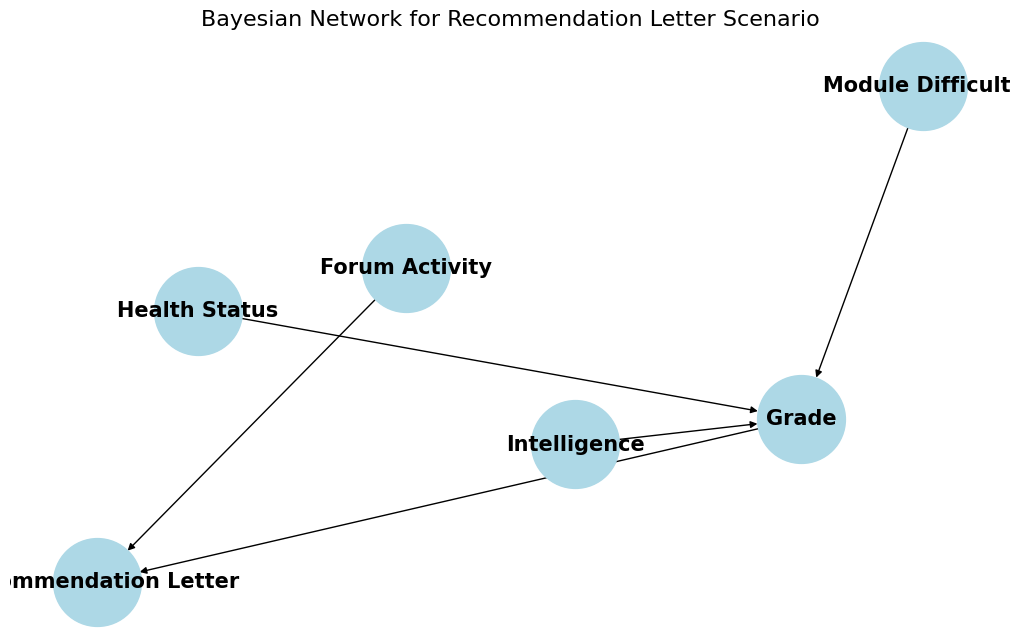

In [2]:
# your code goes here
import matplotlib.pyplot as plt
import networkx as nx

# he structure of the Bayesian Network
net_edges = [("Intelligence", "Grade"), ("Module Difficulty", "Grade"),("Health Status", "Grade"),
             ("Grade", "Recommendation Letter"),("Forum Activity", "Recommendation Letter")]

# Creating the Directed Acyclic Graph (DAG)
G_ = nx.DiGraph()
G_.add_edges_from(net_edges)

# the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_)  # Node Layout
nx.draw(G_, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=15, font_weight='bold')
plt.title("Bayesian Network for Recommendation Letter Scenario", fontsize=16)
plt.show()


This is the Directed Acyclic Graph (DAG) that illustrates the Bayesian Network in the situation where a professor assesses a student's recommendation letter quality based on their forum activity and grade in the CS6264 module. The random variables are represented by the nodes, and their interdependencies are shown by the edges.

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [3]:
%pip install pgmpy


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 100.9 kB/s eta 0:00:20
    --------------------------------------- 0.0/2.0 MB 100.9 kB/s eta 0:00:20
    --------------------------------------- 0.0/2.0 MB 100.9 kB/s eta 0:00:20
    --------------------------------------- 0.0/2.0 MB 89.3 kB/s eta 0:00:22
    --------------------------------------- 0.0/2.0 MB 89.3 kB/s eta 0:00:22
   - -------------------------------------- 0.1/2.0 MB 113.0

In [22]:
# your code goes here

import networkx as nx
from pgmpy.models import BayesianNetwork
import matplotlib.pyplot as plt
from matplotlib import patches

identifier_map = {'Intelligence': 'I', 'Module_Difficulty': 'MD', 'Health_Status': 'HS', 'Grade': 'G','Forum_Activity': 'FA', 
                  'Recommendation_Letter_Quality': 'RLQ'}


# Defining the structure of the Bayesian Network using pgmpy

baye_model = BayesianNetwork([('Intelligence', 'Grade'),('Module_Difficulty', 'Grade'), ('Health_Status', 'Grade'),
                              ('Grade', 'Recommendation_Letter_Quality'), ('Forum_Activity', 'Recommendation_Letter_Quality')])

# show the created Bayesian Network as a DAG

baye_model_edges = baye_model.edges()
baye_model_edges


OutEdgeView([('Intelligence', 'Grade'), ('Grade', 'Recommendation_Letter_Quality'), ('Module_Difficulty', 'Grade'), ('Health_Status', 'Grade'), ('Forum_Activity', 'Recommendation_Letter_Quality')])

### Step 1.4. Show the DAG of the Bayesian Network (1%)

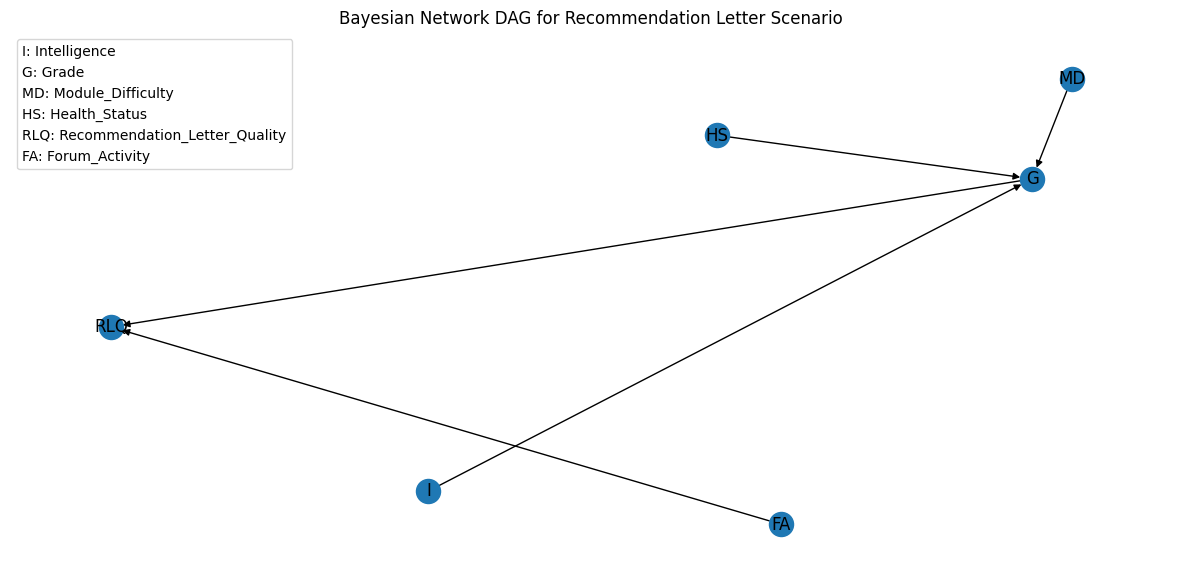

In [26]:

plt.figure(figsize=(15,7))

ax = plt.subplot()
handles = [patches.Patch(label=f'{identifier_map[node]}: {node}') for node in baye_model.nodes()]
ax.legend(handles=handles, handlelength=0, handletextpad=0, fancybox=True)

nx_graph = nx.relabel_nodes(baye_model, identifier_map)
nx.draw(nx_graph, ax=ax, with_labels=True, pos=nx.random_layout(nx_graph))
plt.title("Bayesian Network DAG for Recommendation Letter Scenario")
plt.show()
plt.close()


## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [32]:
# your code goes here

from pgmpy.factors.discrete import TabularCPD

# define CPD for intelligence
# low = 0.7 , high = 0.3
cpd_intelligence = TabularCPD (variable="Intelligence", variable_card=2, values=[[0.7], [0.3]])    

# define CPD for module_difficulty
# easy = 0.6 , hard = 0.4
cpd_module_difficulty = TabularCPD (variable="Module_Difficulty", variable_card=2, values=[[0.6], [0.4]])    

# define CPD for health_status
# sick = 0.6 , healthy = 0.4 
cpd_health_status = TabularCPD (variable="Health_Status", variable_card=2, values=[[0.6], [0.4]])  

# CPD for Grade (depends on Intelligence, Module_Difficulty, and Health_Status)
cpd_grade = TabularCPD(variable='Grade', variable_card=3, values=[[0.3, 0.05, 0.9, 0.5, 0.4, 0.8, 0.2, 0.1],  # Grade A
                                                                  [0.4, 0.25, 0.08, 0.3, 0.3, 0.15, 0.4, 0.6],  # Grade B
                                                                  [0.3, 0.7, 0.02, 0.2, 0.3, 0.05, 0.4, 0.3]],  # Grade C
                                                                  evidence=['Intelligence', 'Module_Difficulty', 'Health_Status'],
                                                                  evidence_card=[2, 2, 2])


# define CPD for Forum_Activity
# not Active = 0.8 , Active= 0.2
cpd_forum_activity = TabularCPD (variable='Forum_Activity', variable_card=2, values=[[0.8], [0.2]])

# CPD for Recommendation_Letter_Quality (depends on Grade and Forum_Activity)
cpd_recommend_letter = TabularCPD(variable='Recommendation_Letter_Quality', variable_card=2,
                     values=[[0.95, 0.8, 0.4, 0.7, 0.9, 0.6],  # strong
                             [0.05, 0.2, 0.6, 0.3, 0.1, 0.4]], # weak
                    evidence=['Grade', 'Forum_Activity'],
                    evidence_card=[3, 2])

### Step 2.2: Associate the distribution models with the network structure (2%)

In [33]:
# your code goes here

# Assuming 'model' is your BayesianNetwork object and CPDs 
baye_model.add_cpds(cpd_intelligence, cpd_module_difficulty, cpd_health_status, cpd_forum_activity, cpd_grade, cpd_recommend_letter)



### Step 2.3: Check the model (2%)

In [34]:
# your code goes here
baye_model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [35]:
# your code goes here
from pgmpy.inference import VariableElimination
inference = VariableElimination(baye_model)

In [36]:
# show the posterior probability results
# your code goes here
# Perform inference to find P(Grade=A | Recommendation_Letter_Quality=strong)
# Assuming 'strong' is encoded as 1

result = inference.query(variables=['Grade'], evidence={'Recommendation_Letter_Quality': 1})  
print(result)

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.1385 |
+----------+--------------+
| Grade(1) |       0.6607 |
+----------+--------------+
| Grade(2) |       0.2008 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [37]:
# your code goes here
prior_prob = inference.query(['Recommendation_Letter_Quality'], evidence={})
print(prior_prob)

+----------------------------------+--------------------------------------+
| Recommendation_Letter_Quality    |   phi(Recommendation_Letter_Quality) |
+==================================+======================================+
| Recommendation_Letter_Quality(0) |                               0.7625 |
+----------------------------------+--------------------------------------+
| Recommendation_Letter_Quality(1) |                               0.2375 |
+----------------------------------+--------------------------------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [38]:
# your code goes here
#assuming 0 as the weak forum activity
prior_prob2 = inference.query(variables=['Recommendation_Letter_Quality'], evidence={'Forum_Activity': 0})
print(prior_prob2)

+----------------------------------+--------------------------------------+
| Recommendation_Letter_Quality    |   phi(Recommendation_Letter_Quality) |
+==================================+======================================+
| Recommendation_Letter_Quality(0) |                               0.7752 |
+----------------------------------+--------------------------------------+
| Recommendation_Letter_Quality(1) |                               0.2248 |
+----------------------------------+--------------------------------------+
